In [8]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

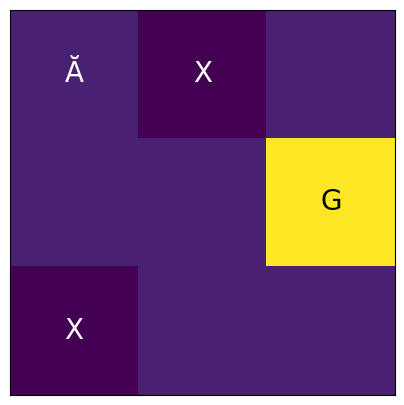

In [30]:

# Define the grid world
grid = np.array([[0, -1, 0], [0, 0, 10], [-1, 0, 0]])

# Create a plot
plt.figure(figsize=(5, 5))
plt.imshow(grid, cmap='viridis', interpolatio n='nearest')
plt.text(0, 0, 'Ă', ha='center', va='center', color='white', fontsize=20)
# Add labels for states
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i, j] == -1:
            plt.text(j, i, 'X', ha='center', va='center', color='white', fontsize=20)
        elif grid[i, j] == 1:
            plt.text(j, i, 'A', ha='center', va='center', color='green', fontsize=20)
        elif grid[i, j] == 10:
            plt.text(j, i, 'G', ha='center', va='center', color='black', fontsize=20)

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Save the plot as an image
plt.savefig('gridworld.png', bbox_inches='tight')
plt.show()


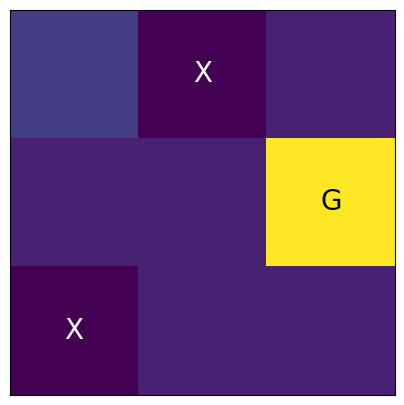

In [26]:
class SimpleGridWorldEnv(gym.Env):
    def __init__(self):
        self.observation_space = gym.spaces.Discrete(3)  # 3 states: S1, S2, G
        self.action_space = gym.spaces.Discrete(2)       # 2 actions: Left, Right
        self.state = 0  # Starting state S1
        self.done = False

        # Define transition dynamics
        self.P = {
            0: {0: [(1.0, 0, -1, False)], 1: [(1.0, 1, -1, False)]},  # Transition from S1
            1: {0: [(1.0, 0, -1, False)], 1: [(1.0, 2, 10, True)]},   # Transition from S2
            2: {0: [], 1: []}  # Terminal state G
        }

        # Define the grid world
        self.grid = np.array([[0, -1, 0], [0, 0, 10], [-1, 0, 0]])

    def reset(self):
        self.state = 0  # Reset to starting state S1
        self.done = False
        return self.state

    def step(self, action):
        transitions = self.P[self.state][action]
        prob, next_state, reward, done = transitions[0]  # Assuming deterministic transitions
        self.state = next_state
        self.done = done
        if done and reward != 10:  # If the agent did not reach the goal state
            reward = -10  # Penalize for reaching a non-goal terminal state
        return self.state, reward, self.done, {}

    def render(self):
        grid_with_agent = np.copy(self.grid)
        grid_with_agent[self.state // 3, self.state % 3] = 1  # Place agent in the grid
        return grid_with_agent

# Create an instance of the environment
env = SimpleGridWorldEnv()

# Render the grid world
plt.figure(figsize=(5, 5))
plt.imshow(env.render(), cmap='viridis', interpolation='nearest')

# Add labels for states
for i in range(env.grid.shape[0]):
    for j in range(env.grid.shape[1]):
        if env.grid[i, j] == -1:
            plt.text(j, i, 'X', ha='center', va='center', color='white', fontsize=20)
        elif env.grid[i, j] == 1:
            plt.text(j, i, 'A', ha='center', va='center', color='black', fontsize=20)
        elif env.grid[i, j] == 10:
            plt.text(j, i, 'G', ha='center', va='center', color='black', fontsize=20)

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Save the plot as an image
plt.savefig('gridworld.png', bbox_inches='tight')
plt.show()


reward:  -1 action 0
reward:  -1 action 0
reward:  -1 action 1
reward:  10 action 1


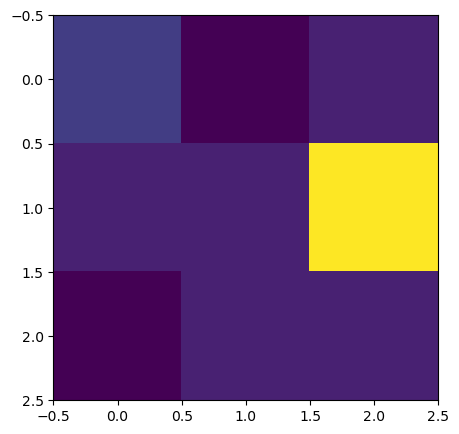

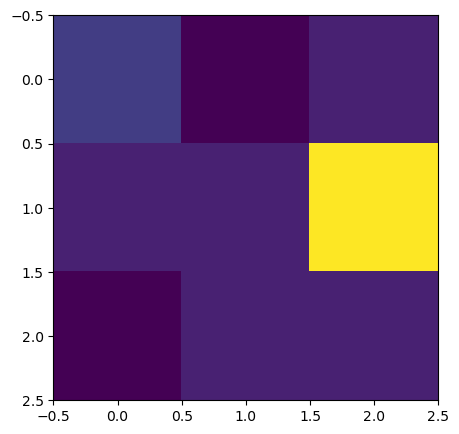

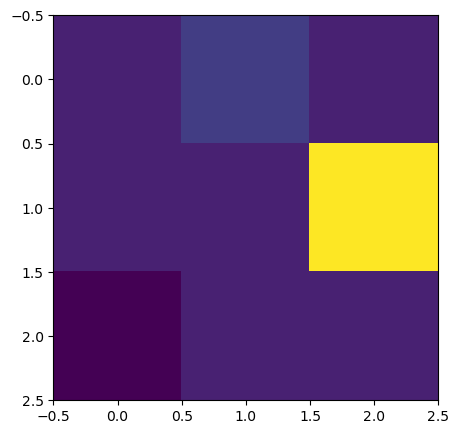

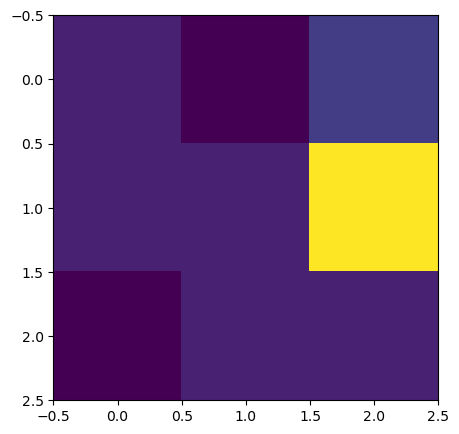

In [22]:
env = SimpleGridWorldEnv()
obs = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Random action
    obs, reward, done, _ = env.step(action)
    plt.figure(figsize=(5, 5))
    plt.imshow(env.render(), cmap='viridis', interpolation='nearest')
    print("reward: ", reward, "action", action)
    env.render()

env.close()

In [11]:
class SimpleGridWorldEnv(gym.Env):
    def __init__(self):
        self.observation_space = gym.spaces.Discrete(3)  # 3 states: S1, S2, G
        self.action_space = gym.spaces.Discrete(2)       # 2 actions: Left, Right
        self.state = 0  # Starting state S1
        self.done = False

        # Define transition dynamics
        self.P = {
            0: {0: [(1.0, 0, -1, False)], 1: [(1.0, 1, -1, False)]},  # Transition from S1
            1: {0: [(1.0, 0, -1, False)], 1: [(1.0, 2, 10, True)]},   # Transition from S2
            2: {0: [], 1: []}  # Terminal state G
        }

        # Define the grid world
        self.grid = np.array([[0, -1, 0], [0, 0, 10], [-1, 0, 0]])

    def reset(self):
        self.state = 0  # Reset to starting state S1
        self.done = False
        return self.state

    def step(self, action):
        transitions = self.P[self.state][action]
        prob, next_state, reward, done = transitions[0]  # Assuming deterministic transitions
        self.state = next_state
        self.done = done
        if done and reward != 10:  # If the agent did not reach the goal state
            reward = -10  # Penalize for reaching a non-goal terminal state
        return self.state, reward, self.done, {}

    def render(self):
        grid_with_agent = np.copy(self.grid)
        grid_with_agent[self.state // 3, self.state % 3] = 1  # Place agent in the grid
        return grid_with_agent

In [12]:
# Value Iteration Algorithm
def value_iteration(env, gamma=0.9, epsilon=1e-6):
    # Initialize value function with zeros
    V = np.zeros(env.observation_space.n)

    while True:
        delta = 0
        for s in range(env.observation_space.n):
            v = V[s]
            V[s] = max([sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])
            delta = max(delta, abs(v - V[s]))
        if delta < epsilon:
            break

    return V

In [13]:
# Policy Iteration Algorithm
def policy_iteration(env, gamma=0.9, epsilon=1e-6):
    # Initialize policy with zeros (arbitrary)
    policy = np.zeros(env.observation_space.n, dtype=np.int64)

    while True:
        # Policy Evaluation
        V = np.zeros(env.observation_space.n)
        while True:
            delta = 0
            for s in range(env.observation_space.n):
                v = V[s]
                V[s] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][policy[s]]])
                delta = max(delta, abs(v - V[s]))
            if delta < epsilon:
                break
        
        # Policy Improvement
        policy_stable = True
        for s in range(env.observation_space.n):
            old_action = policy[s]
            policy[s] = np.argmax([sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable:
            break

    return policy, V

Value function (Value Iteration): [ 8. 10.  0.]
Optimal Policy (Policy Iteration): [1 1 0]
Value function (Policy Iteration): [ 8. 10.  0.]


/Users/453543/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment SimpleGridWorldEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


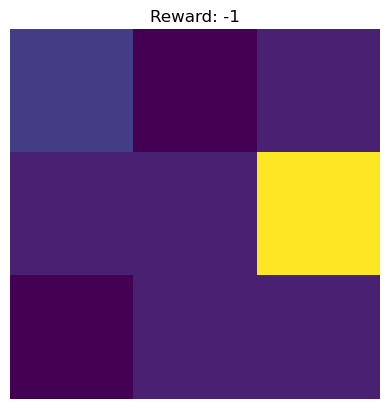

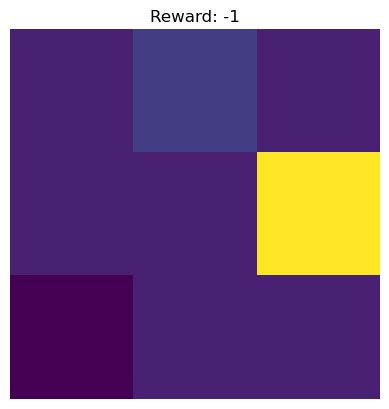

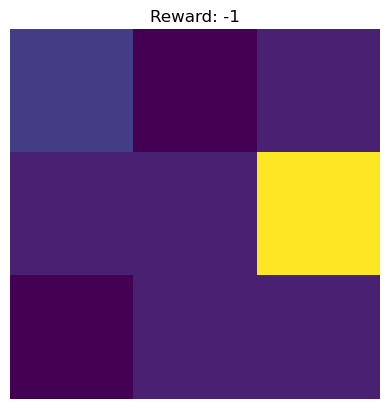

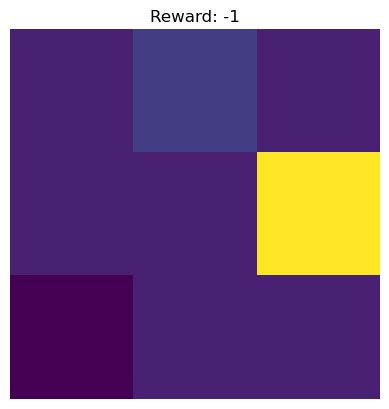

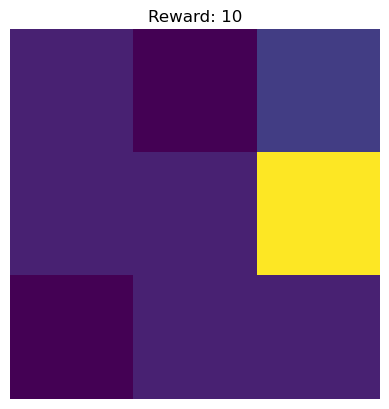

Total rewards: 6


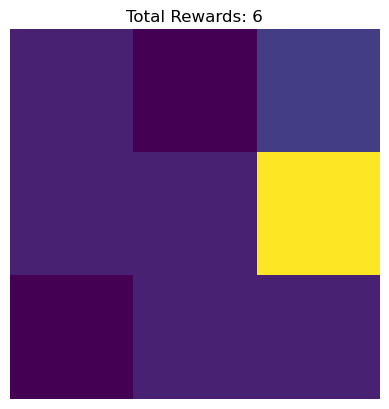

In [14]:
if __name__ == "__main__":
    env = SimpleGridWorldEnv()

    gym.register(
        id='SimpleGridWorldEnv-v0',
        entry_point='__main__:SimpleGridWorldEnv',
    )

    # Run value iteration
    V_value_iteration = value_iteration(env)
    print("Value function (Value Iteration):", V_value_iteration)

    # Run policy iteration
    policy_policy_iteration, V_policy_iteration = policy_iteration(env)
    print("Optimal Policy (Policy Iteration):", policy_policy_iteration)
    print("Value function (Policy Iteration):", V_policy_iteration)

    observation = env.reset()
    rewards = 0
    while not env.done:
        action = env.action_space.sample()  # Replace with your own action selection logic
        observation, reward, done, info = env.step(action)
        rewards += reward
        # Display the grid with the agent at each step
        plt.imshow(env.render(), cmap='viridis', interpolation='nearest')
        plt.axis('off')
        plt.title(f"Reward: {reward}")
        plt.show()

    # Display the final grid with the agent and the total rewards
    print("Total rewards:", rewards)
    plt.imshow(env.render(), cmap='viridis', interpolation='nearest')
    plt.axis('off')
    plt.title(f"Total Rewards: {rewards}")
    plt.show()
    